Квадратичный подход

In [2]:
import random
import numpy as np
from matplotlib import pyplot as plt
def square_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    predicted_price = base_price + price_per_room*num_rooms
    base_price += learning_rate*(price - predicted_price)
    price_per_room += learning_rate * num_rooms * (price - predicted_price)
    return price_per_room, base_price

In [3]:
def draw_line(slope, y_intercept, color='grey', linewidth=0.7, starting=0, ending=8):
    x = np.linspace(starting, ending, 1000)
    plt.plot(x, y_intercept + slope*x, linestyle='-', color=color, linewidth=linewidth)
    
def draw_points(features, labels, color = 'blue'):
    x = np.array(features)
    y = np.array(labels)
    plt.scatter(x, y)

In [4]:

def linear_regression(features, labels, learning_rate = 0.01, epochs = 1000):
    price_per_room = random.random()
    base_price = random.random()
    for epoch in range(epochs):
        #draw_line(price_per_room, base_price, starting=0, ending=8)
        i = random.randint(0, len(features) - 1)
        num_rooms = features[i]
        price = labels[i]
        price_per_room, base_price = square_trick(base_price, price_per_room, num_rooms, price, learning_rate = learning_rate)
        
    draw_points(features, labels)
    draw_line(price_per_room, base_price, 'black', starting = 0, ending = 8)
    y = price_per_room * 4 + base_price
    print(y)
    return price_per_room, base_price

In [5]:
labels = np.array([152, 208, 266, 358, 407, 452])
features = np.array([1,2,3,5,6,7])

307.9158856588333


(49.5639359559509, 109.66014183502972)

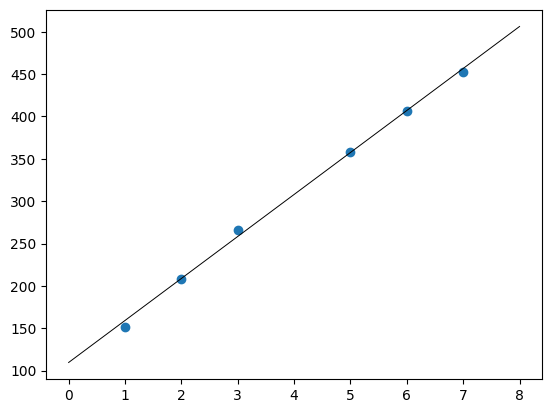

In [6]:
linear_regression(features, labels, learning_rate= 0.01, epochs = 10000)

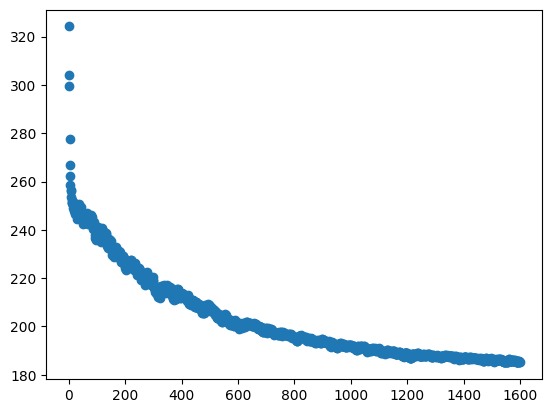

309.0192757963282


(50.83801264481492, 105.66722521706856)

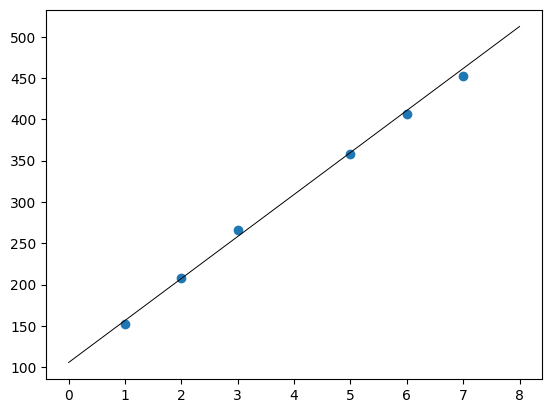

In [7]:
def rmse(labels, predictions):
    n = len(labels)
    diff = np.subtract(labels, predictions)
    return np.sqrt(1.0/n * (np.dot(diff, diff)))
    
def linear_regression_rmse(features, labels, learning_rate = 0.01, epochs = 1000):
    price_per_room = random.random()
    base_price = random.random()
    errors = []
    for i in range(epochs):
        predictions = features[0] * price_per_room + base_price
        errors.append(rmse(labels, predictions))
        i = random.randint(0, len(features) - 1)
        num_rooms = features[i]
        price = labels[i]
        price_per_room, base_price = square_trick(base_price,
                                                  price_per_room,
                                                  num_rooms,
                                                  price,
                                                  learning_rate = learning_rate)
    plt.scatter(range(len(errors)), errors)

    plt.show()
    y = price_per_room * 4 + base_price
    print(y)
    draw_points(features, labels)
    draw_line(price_per_room, base_price, 'black', starting = 0, ending = 8)
    return price_per_room, base_price
linear_regression_rmse(features, labels, learning_rate = 0.01, epochs = 1600)

In [9]:
import pandas as pd
df = pd.read_csv("Hyderabad.csv")
dfTest = pd.DataFrame(df)
dfTest

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,Nizampet,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,Hitech City,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,Manikonda,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,Alwal,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,Kukatpally,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513,11000000,1460,Nacharam,2,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2514,26000000,1314,Manikonda,2,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2515,13300000,2625,Madhapur,3,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2516,10800000,2050,Hitech City,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
